In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random
import scipy
from sklearn.model_selection import train_test_split

In [2]:
# Specify the directory containing the dataset
# dataset_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset"
# label_images_dir = os.path.join(dataset_dir, "label_images_semantic")
# original_images_dir = os.path.join(dataset_dir, "original_images")

# Step 1: Load and preprocess the data
rgb_images_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images"
bw_images_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic"
color_masks_dir = "/home/don/Git/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks"
csv_file = "/home/don/Git/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv"

print("Loading the dataset...")
print(rgb_images_dir)
print(bw_images_dir)
print(color_masks_dir)
print(csv_file)

# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset
# print(dataset_dir)
# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
# print(label_images_dir)
# # /home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
# print(original_images_dir)

Loading the dataset...
/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/original_images
/home/don/Git/aerial-semantic-segmentation/dataset_here/dataset/semantic_drone_dataset/label_images_semantic
/home/don/Git/aerial-semantic-segmentation/dataset_here/RGB_color_image_masks/RGB_color_image_masks
/home/don/Git/aerial-semantic-segmentation/dataset_here/class_dict_seg.csv


In [3]:
def load_data():
    rgb_images = []
    rgb_images_names = []
    bw_images = []
    bw_images_names = []
    color_masks = []
    color_masks_names = []

    # Load RGB images
    for image_name in sorted(os.listdir(rgb_images_dir)):
        image_path = os.path.join(rgb_images_dir, image_name)
        if image_name.lower().endswith('.jpg') or image_name.lower().endswith('.jpeg'):
            label = os.path.splitext(image_name)[0]
            rgb_images.append(image_path)
            rgb_images_names.append(label)

    # Load black and white images
    for image_name in sorted(os.listdir(bw_images_dir)):
        image_path = os.path.join(bw_images_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            bw_images.append(image_path)
            bw_images_names.append(label)

    # Load color masks
    for image_name in sorted(os.listdir(color_masks_dir)):
        image_path = os.path.join(color_masks_dir, image_name)
        if image_name.lower().endswith('.png'):
            label = os.path.splitext(image_name)[0]
            color_masks.append(image_path)
            color_masks_names.append(label)

    return rgb_images, bw_images, color_masks

# Call the function to load the data
rgb_images, bw_images, color_masks = load_data()

# Print the number of images loaded
print("Number of RGB images loaded:", len(rgb_images))
print("Number of black and white images loaded:", len(bw_images))
print("Number of color masks loaded:", len(color_masks))





Number of RGB images loaded: 400
Number of black and white images loaded: 400
Number of color masks loaded: 400


RGB image has shape: (4000, 6000, 3)
RGB image has size: 72000000
Black and white image has shape: (4000, 6000, 3)
Black and white image has size: 72000000
Color mask has shape: (4000, 6000, 3)
Color mask has size: 72000000


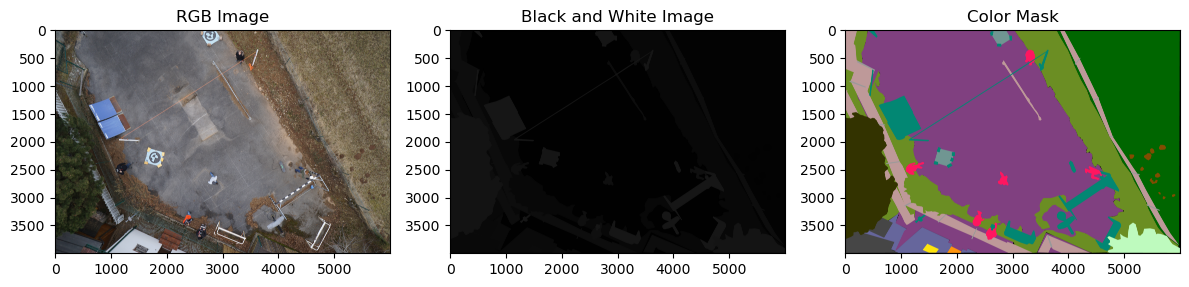

In [4]:
import matplotlib.pyplot as plt

# Select an image index to visualize
selected_index = 1

# Load the selected images
rgb_image = cv2.imread(rgb_images[selected_index])
bw_image = cv2.imread(bw_images[selected_index])
color_mask = cv2.imread(color_masks[selected_index])

# Display information about that rgb images such as size and shape
print("RGB image has shape:", rgb_image.shape)
print("RGB image has size:", rgb_image.size)

# Display information about that black and white images such as size and shape
print("Black and white image has shape:", bw_image.shape)
print("Black and white image has size:", bw_image.size)

# Display information about that color mask such as size and shape
print("Color mask has shape:", color_mask.shape)
print("Color mask has size:", color_mask.size)


# Create a figure with subplots to display the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot RGB image
axes[0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("RGB Image")

# Plot black and white image
axes[1].imshow(cv2.cvtColor(bw_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Black and White Image")

# Plot color mask
axes[2].imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
axes[2].set_title("Color Mask")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Number of resized RGB images: 400
Number of resized black and white images: 400
Number of resized color masks: 400


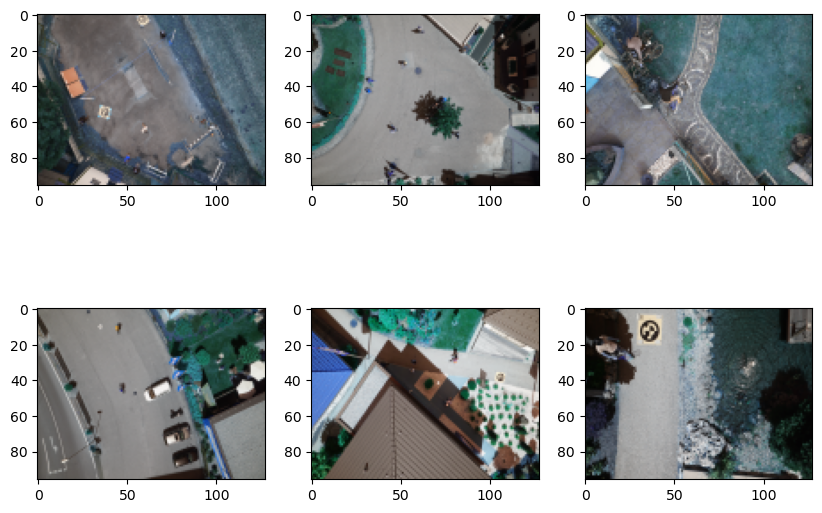

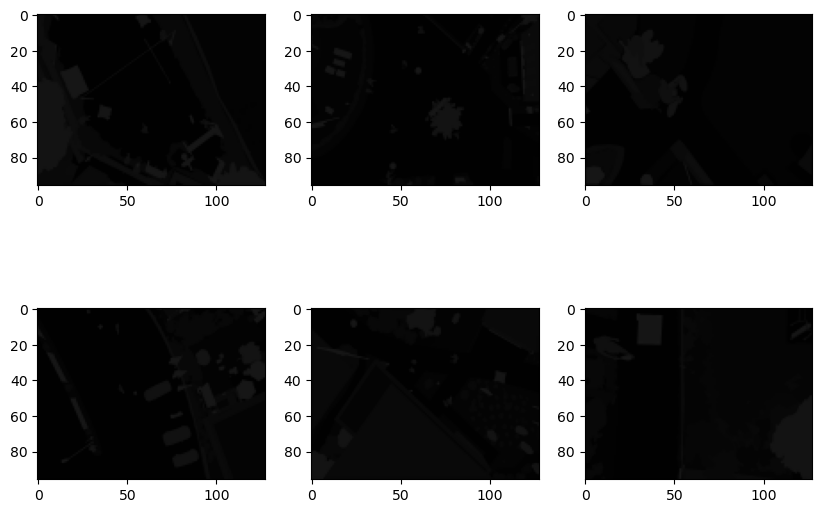

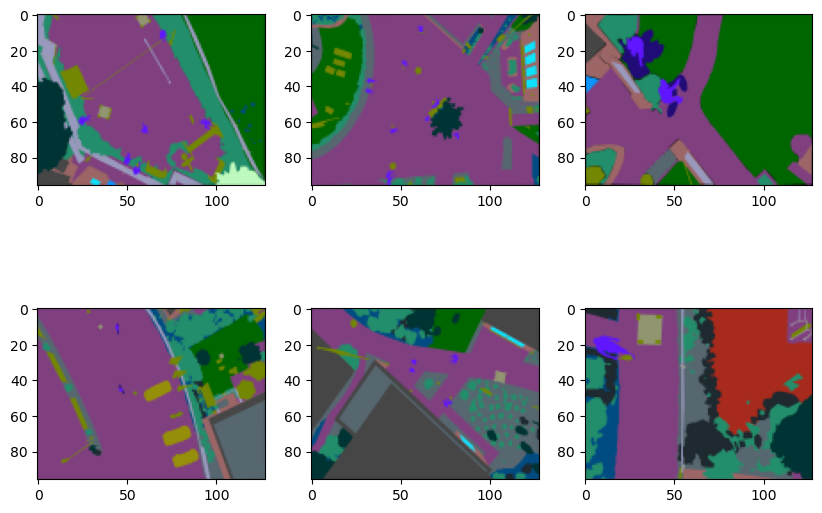

In [5]:
# Resize all the images sets to be size 256x256
def resize_images(rgb_images, bw_images, color_masks):
    resized_rgb_images = []
    resized_bw_images = []
    resized_color_masks = []

    for i in range(len(rgb_images)):
        rgb_image = cv2.imread(rgb_images[i])
        bw_image = cv2.imread(bw_images[i])
        color_mask = cv2.imread(color_masks[i])

        # Resize RGB images
        resized_rgb_image = cv2.resize(rgb_image, (128, 96), interpolation=cv2.INTER_AREA)
        resized_rgb_images.append(resized_rgb_image)

        # Resize black and white images
        resized_bw_image = cv2.resize(bw_image, (128, 96), interpolation=cv2.INTER_AREA)
        resized_bw_images.append(resized_bw_image)

        # Resize color masks
        resized_color_mask = cv2.resize(color_mask, (128, 96), interpolation=cv2.INTER_AREA)
        resized_color_masks.append(resized_color_mask)

    return resized_rgb_images, resized_bw_images, resized_color_masks

# Call the function to resize the images
resized_rgb_images, resized_bw_images, resized_color_masks = resize_images(rgb_images, bw_images, color_masks)

# Print the number of images resized
print("Number of resized RGB images:", len(resized_rgb_images))
print("Number of resized black and white images:", len(resized_bw_images))
print("Number of resized color masks:", len(resized_color_masks))

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_rgb_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_bw_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Visualise some of the images from the dataset
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = resized_color_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# # Convert the images to numpy arrays
# resized_rgb_images = np.array(resized_rgb_images)
# resized_bw_images = np.array(resized_bw_images)
# resized_color_masks = np.array(resized_color_masks)

# # Print the shape of the resized images
# print("Shape of resized RGB images:", resized_rgb_images.shape)
# print("Shape of resized black and white images:", resized_bw_images.shape)
# print("Shape of resized color masks:", resized_color_masks.shape)



In [43]:
# # Do some data augmentation : rotate and flip the images. Then plot to visualise the augmenting images
# def augment_data(rgb_images, bw_images, color_masks):
#     augmented_rgb_images = []
#     augmented_bw_images = []
#     augmented_color_masks = []

#     # Loop through each image in the dataset
#     for i in range(len(rgb_images)):
#         # Rotate the image and mask
#         rotated_rgb_image = scipy.ndimage.rotate(rgb_images[i], 90)
#         rotated_bw_image = scipy.ndimage.rotate(bw_images[i], 90)
#         rotated_color_mask = scipy.ndimage.rotate(color_masks[i], 90)

#         # Flip the image and mask
#         flipped_rgb_image = np.fliplr(rgb_images[i])
#         flipped_bw_image = np.fliplr(bw_images[i])
#         flipped_color_mask = np.fliplr(color_masks[i])

#         # Append rotated and flipped images to the list
#         augmented_rgb_images.append(rotated_rgb_image)
#         augmented_rgb_images.append(flipped_rgb_image)
#         augmented_bw_images.append(rotated_bw_image)
#         augmented_bw_images.append(flipped_bw_image)
#         augmented_color_masks.append(rotated_color_mask)
#         augmented_color_masks.append(flipped_color_mask)

#     return augmented_rgb_images, augmented_bw_images, augmented_color_masks

# # Call the function to augment the data
# augmented_rgb_images, augmented_bw_images, augmented_color_masks = augment_data(resized_rgb_images, resized_bw_images, resized_color_masks)

# # Print the number of images augmented
# print("Number of augmented RGB images:", len(augmented_rgb_images))
# print("Number of augmented black and white images:", len(augmented_bw_images))
# print("Number of augmented color masks:", len(augmented_color_masks))

# # Visualise some of the images from the dataset
# fig = plt.figure(figsize=(10, 7))
# columns = 3
# rows = 2

# for i in range(1, columns*rows +1):
#     img = augmented_rgb_images[i]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)

# plt.show()



In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2023-06-03 16:08:05.468142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 16:08:05.733151: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-03 16:08:05.789911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/cv2/../../lib64:
2023-

In [7]:
# Step 2: Prepare the training data
# the new data is resized_rgb_images, resized_bw_images, resized_color_masks
input_images = resized_rgb_images  # Use RGB images as input
output_masks = resized_color_masks  # Use color masks as output

# input_images = rgb_images  # Use RGB images as input
# output_masks = color_masks  # Use color masks as output

# Step 3: Split the data
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Split into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(input_images, output_masks, test_size=test_ratio, random_state=42)

# Further split train set into train and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)


# Convert this list to numpy array
train_images = np.array(train_images)
train_masks = np.array(train_masks)
val_images = np.array(val_images)
val_masks = np.array(val_masks)
test_images = np.array(test_images)
test_masks = np.array(test_masks)




# Print the number of images and masks
print("Number of train images:", len(train_images))
print("Number of train masks:", len(train_masks))
print("Number of val images:", len(val_images))
print("Number of val masks:", len(val_masks))
print("Number of test images:", len(test_images))
print("Number of test masks:", len(test_masks))

# Print the type of the train, val and test sets
print("Type of train images:", type(train_images))
print("Type of train masks:", type(train_masks))
print("Type of val images:", type(val_images))
print("Type of val masks:", type(val_masks))
print("Type of test images:", type(test_images))
print("Type of test masks:", type(test_masks))

# Print the shape of the train, val and test sets
print("Shape of train images:", train_images.shape)
print("Shape of train masks:", train_masks.shape)
print("Shape of val images:", val_images.shape)
print("Shape of val masks:", val_masks.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test masks:", test_masks.shape)


Number of train images: 279
Number of train masks: 279
Number of val images: 81
Number of val masks: 81
Number of test images: 40
Number of test masks: 40
Type of train images: <class 'numpy.ndarray'>
Type of train masks: <class 'numpy.ndarray'>
Type of val images: <class 'numpy.ndarray'>
Type of val masks: <class 'numpy.ndarray'>
Type of test images: <class 'numpy.ndarray'>
Type of test masks: <class 'numpy.ndarray'>
Shape of train images: (279, 96, 128, 3)
Shape of train masks: (279, 96, 128, 3)
Shape of val images: (81, 96, 128, 3)
Shape of val masks: (81, 96, 128, 3)
Shape of test images: (40, 96, 128, 3)
Shape of test masks: (40, 96, 128, 3)


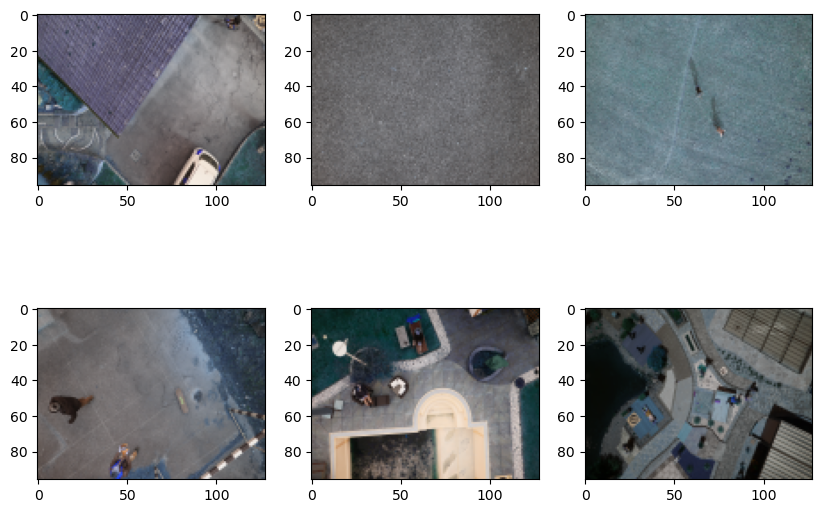

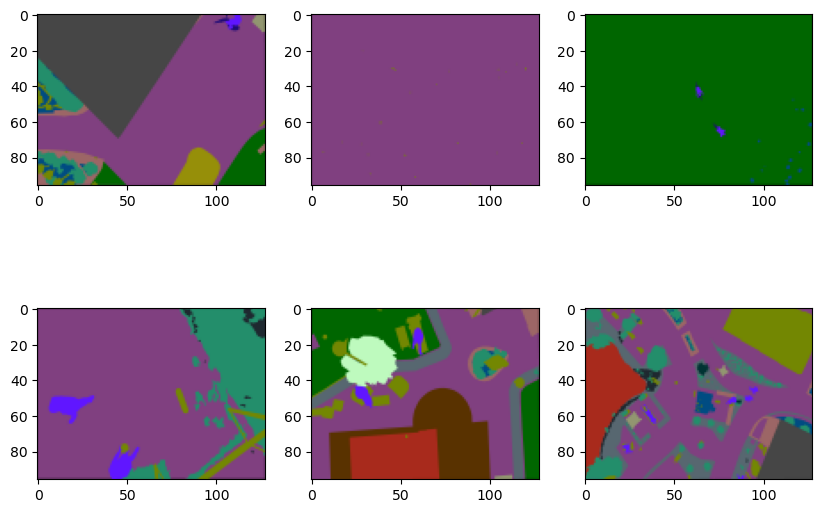

<Figure size 1000x700 with 0 Axes>

In [8]:
# Visualise some of the images from each of train images, val images and test images and their corresponding masks
fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img = train_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    img = train_masks[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

fig = plt.figure(figsize=(10, 7))
columns = 3
rows = 2


In [9]:
import pandas
# import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.16      1.00      0.27         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         114       0.00    

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.16      1.00      0.27         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         114       0.00    

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don

              precision    recall  f1-score   support

           0       0.19      1.00      0.32         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         111       0.00    

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don

              precision    recall  f1-score   support

           0       0.19      1.00      0.32         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         0
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         112       0.00    

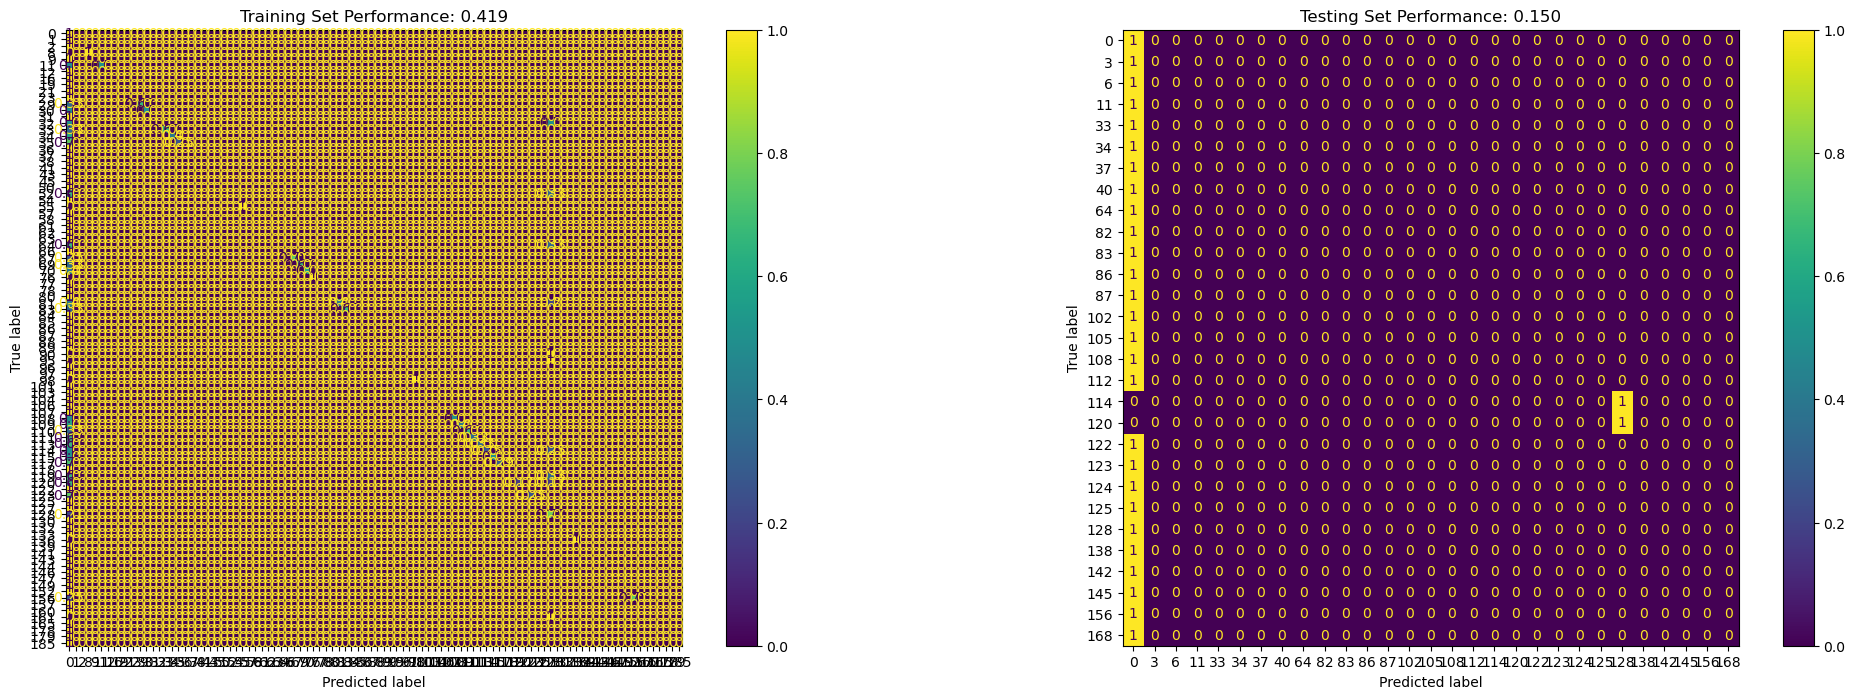

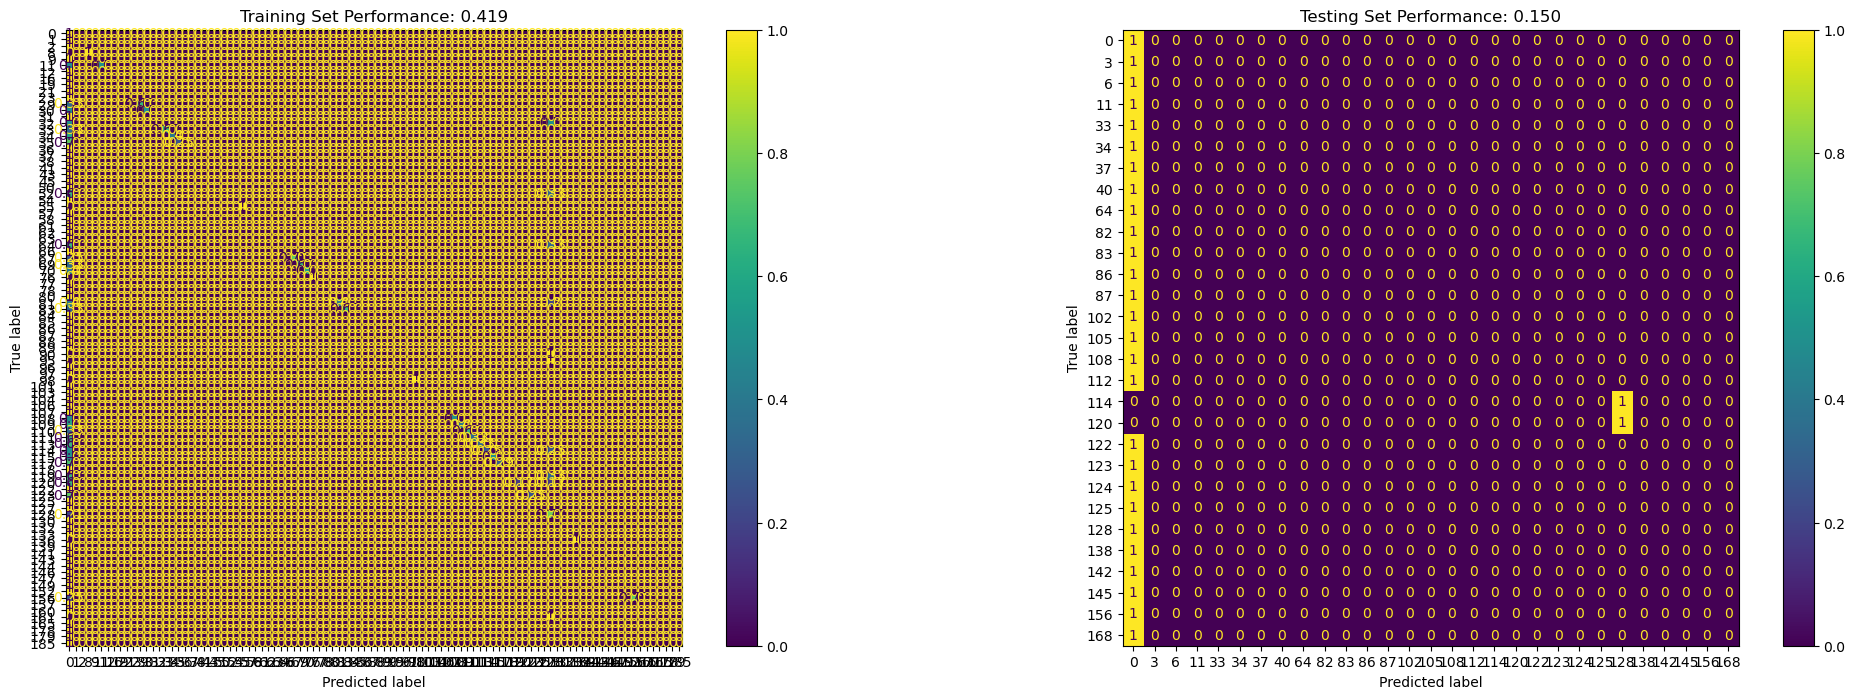

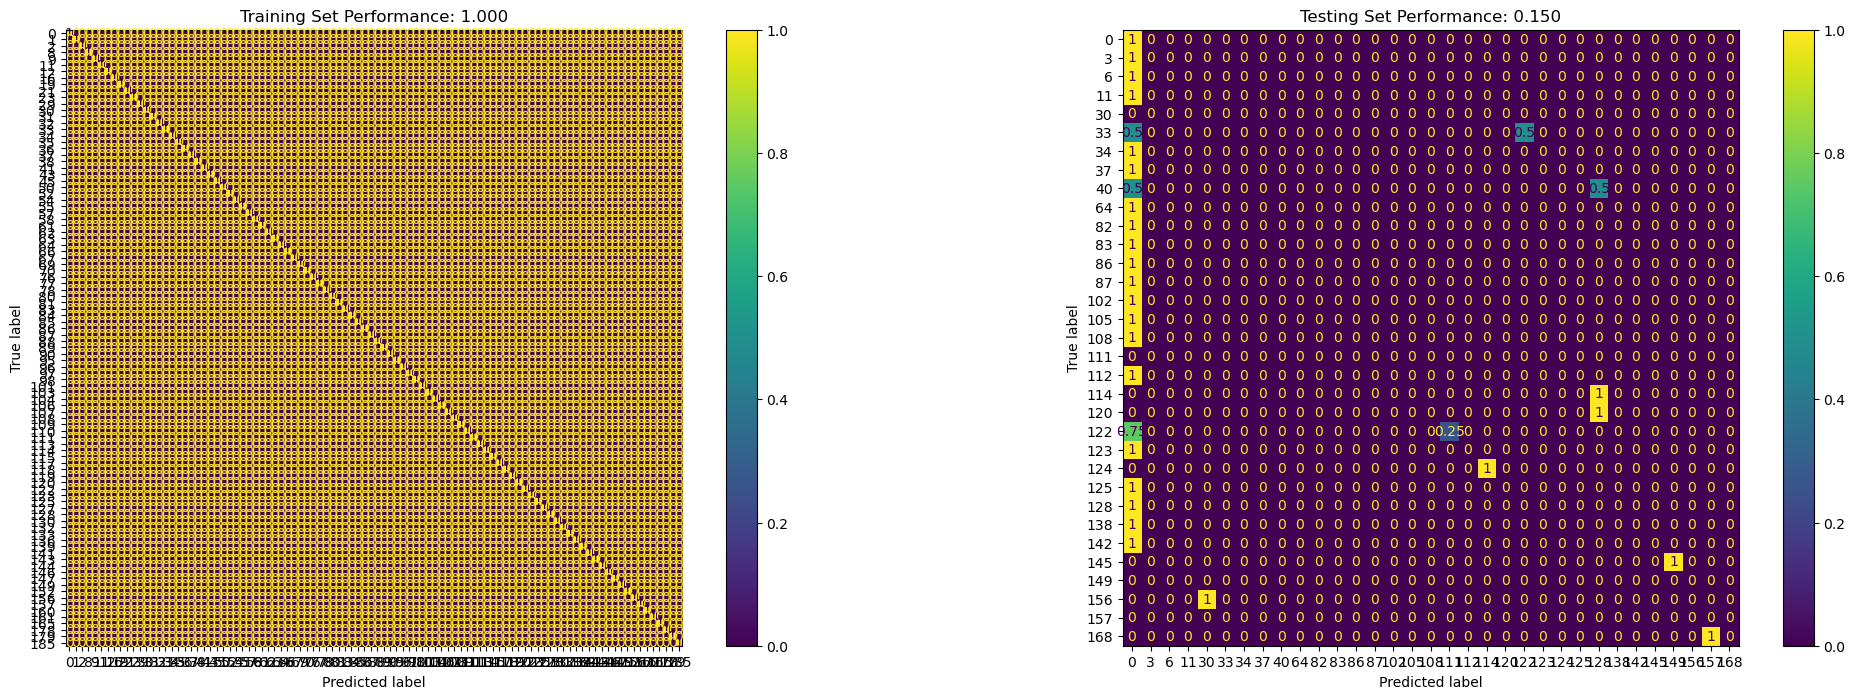

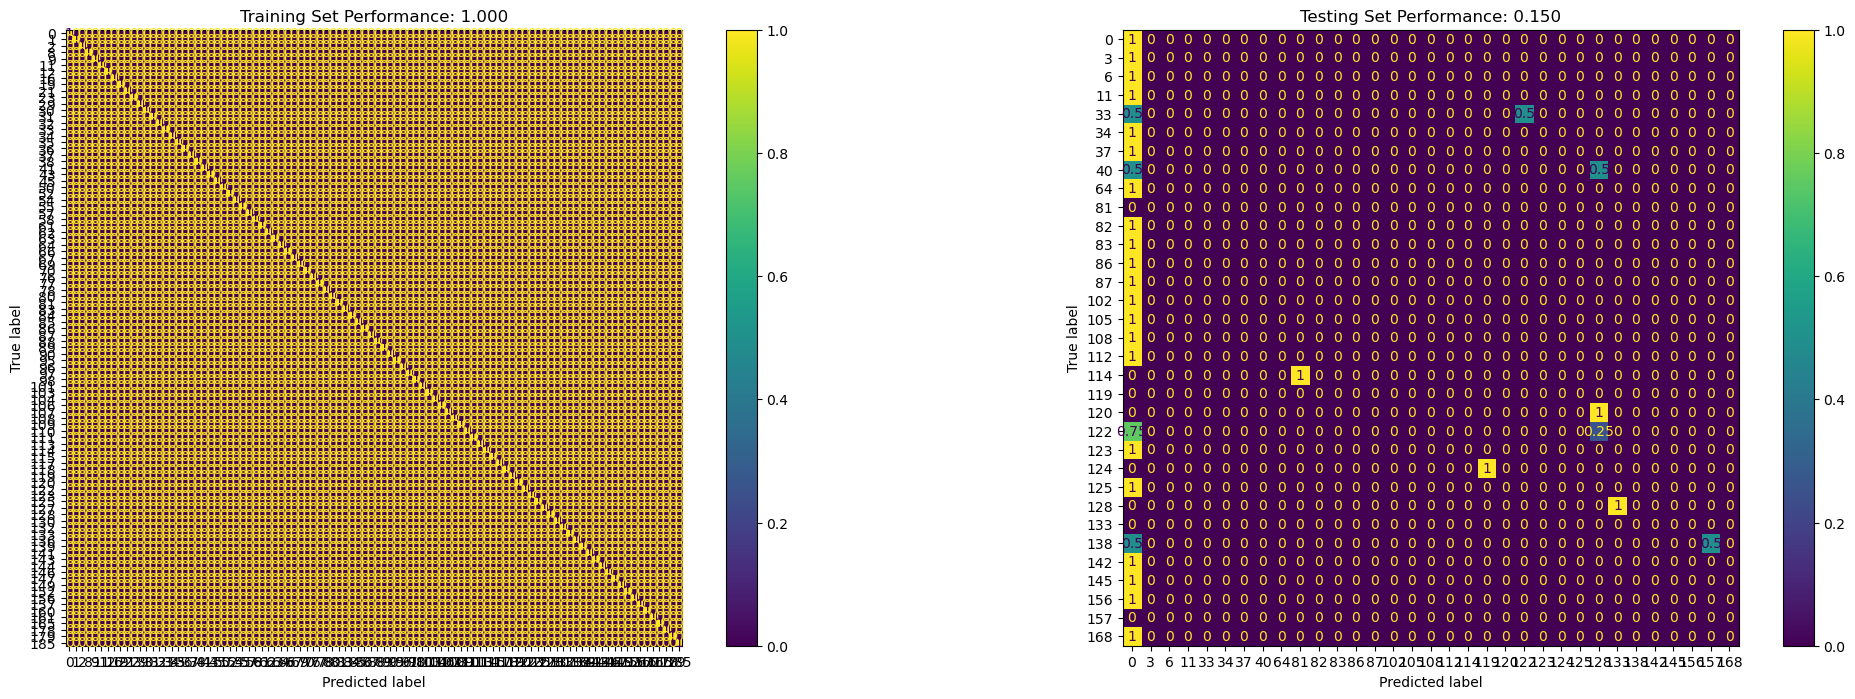

In [18]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - get precision, recall, f1 for test data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)));
    print(classification_report(Y_test, model.predict(X_test)))



# Flatten the images and masks
train_images_flat = train_images.reshape(len(train_images), -1)
train_masks_flat = train_masks.reshape(len(train_masks), -1)
test_images_flat = test_images.reshape(len(test_images), -1)
test_masks_flat = test_masks.reshape(len(test_masks), -1)

# Flatten the masks to 1D array
train_masks_flat = train_masks_flat[:, 0]
test_masks_flat = test_masks_flat[:, 0]

# one vs one classifier
svm = SVC()
svm.fit(train_images_flat, train_masks_flat)
eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)

# one vs rest classifier
svm = SVC(decision_function_shape='ovo')
svm.fit(train_images_flat, train_masks_flat)
eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)

# other svm
svm = SVC(kernel='linear', decision_function_shape='ovo')
svm.fit(train_images_flat, train_masks_flat)
eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)

# other svm
svm = SVC(kernel='poly', decision_function_shape='ovo')
svm.fit(train_images_flat, train_masks_flat)
eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)




In [24]:
# Load the class labels from the class_dict_seg.csv file
labels = pd.read_csv(csv_file, header=None)
print(labels)

# get only the class names
class_names = labels[0].values
print(class_names)

# remove the first element which is 'name', second element which is 'unlabeled' and last element which is 'none'
class_names = class_names[1:-1]
print(class_names)




              0     1     2     3
0          name     r     g     b
1     unlabeled     0     0     0
2    paved-area   128    64   128
3          dirt   130    76     0
4         grass     0   102     0
5        gravel   112   103    87
6         water    28    42   168
7         rocks    48    41    30
8          pool     0    50    89
9    vegetation   107   142    35
10         roof    70    70    70
11         wall   102   102   156
12       window   254   228    12
13         door   254   148    12
14        fence   190   153   153
15   fence-pole   153   153   153
16       person   255    22    96
17          dog   102    51     0
18          car     9   143   150
19      bicycle   119    11    32
20         tree    51    51     0
21    bald-tree   190   250   190
22    ar-marker   112   150   146
23     obstacle     2   135   115
24  conflicting   255     0     0
['name' 'unlabeled' 'paved-area' 'dirt' 'grass' 'gravel' 'water' 'rocks'
 'pool' 'vegetation' 'roof' 'wall' 'window'

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.16      1.00      0.27         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         114       0.00    

/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/don/anaconda3/envs/cab420/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.16      1.00      0.27         6
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          64       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         112       0.00      0.00      0.00         1
         114       0.00    

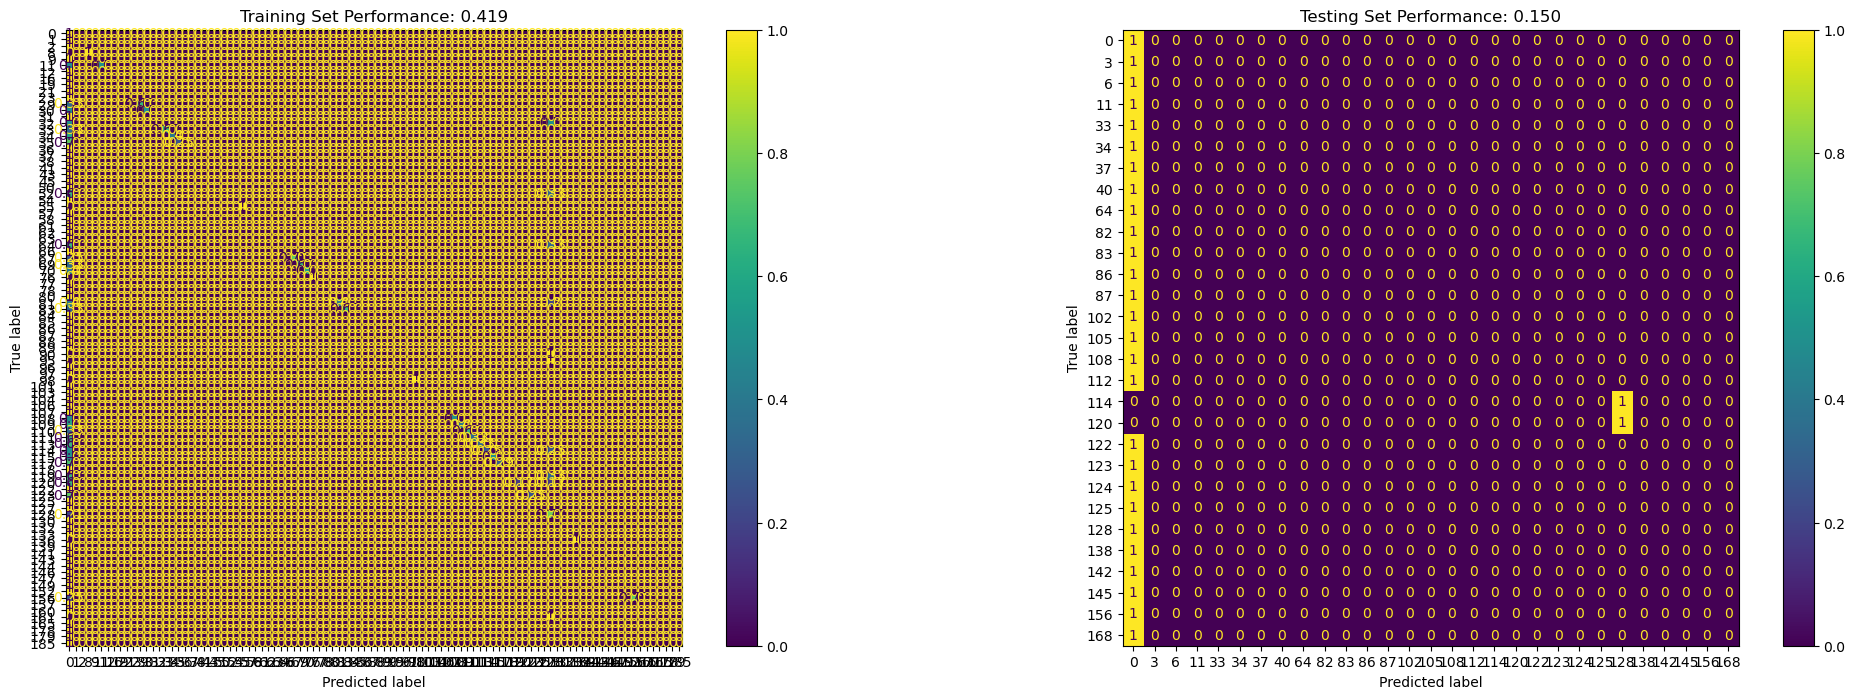

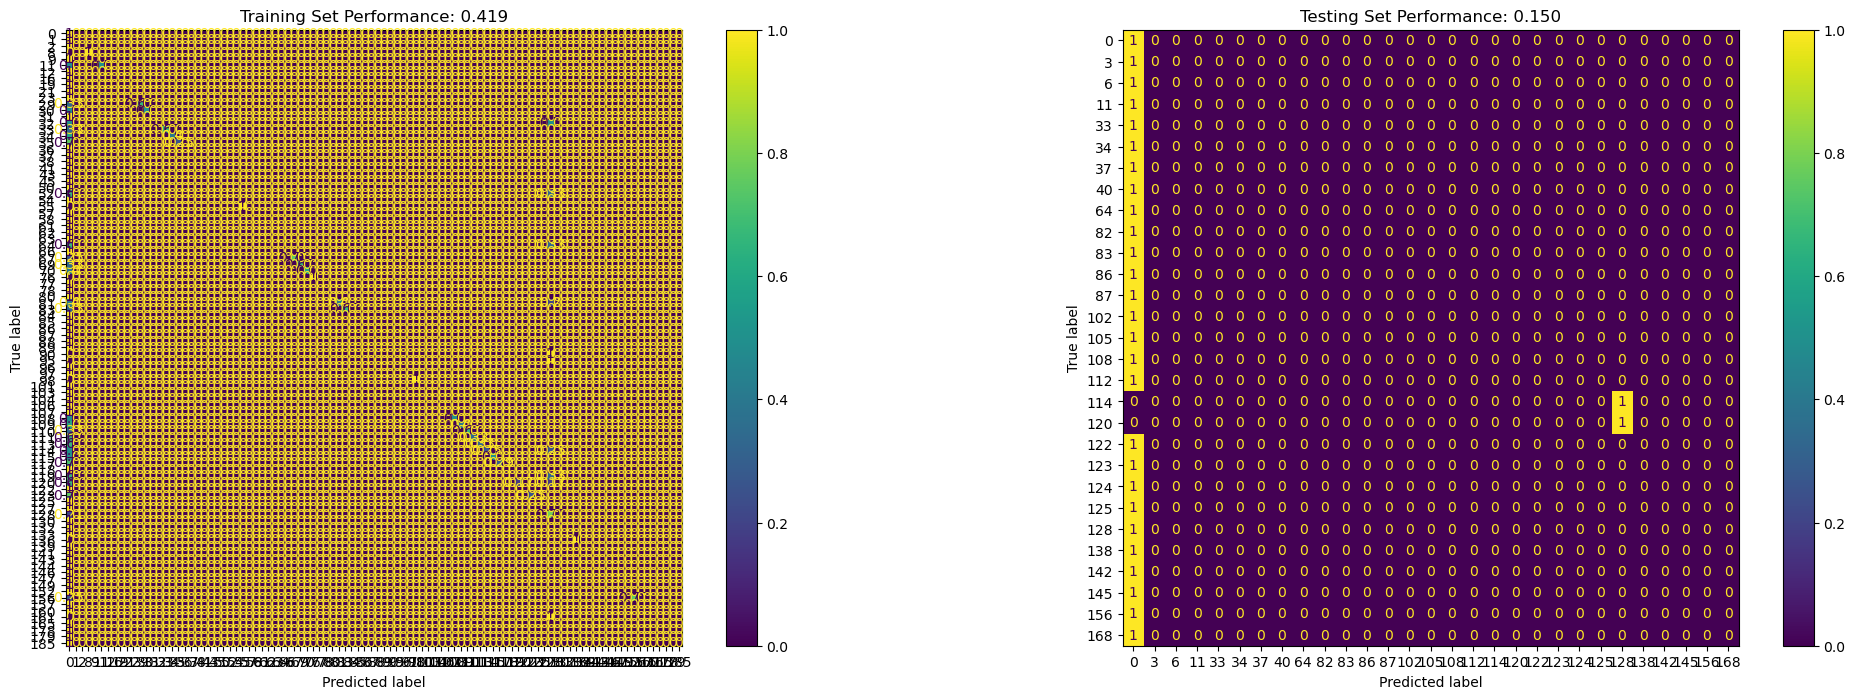

In [37]:
train_images_flat = train_images.reshape(len(train_images), -1)
train_masks_flat = train_masks.reshape(len(train_masks), -1)
test_images_flat = test_images.reshape(len(test_images), -1)
test_masks_flat = test_masks.reshape(len(test_masks), -1)


train_masks_flat = train_masks_flat[:, 0]
test_masks_flat = test_masks_flat[:, 0]


svm = SVC()
svm.fit(train_images_flat, train_masks_flat)


eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance: %1.3f' % (sum(model.predict(X_train) == Y_train)/len(Y_train)))
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Testing Set Performance: %1.3f' % (sum(model.predict(X_test) == Y_test)/len(Y_test)))
    print(classification_report(Y_test, model.predict(X_test)))


# Flatten the images and masks
train_images_flat = train_images.reshape(len(train_images), -1)
train_masks_flat = train_masks.reshape(len(train_masks), -1)
test_images_flat = test_images.reshape(len(test_images), -1)
test_masks_flat = test_masks.reshape(len(test_masks), -1)

# Flatten the masks to 1D array
train_masks_flat = train_masks_flat[:, 0]
test_masks_flat = test_masks_flat[:, 0]

# Train the SVM model
svm = SVC()
svm.fit(train_images_flat, train_masks_flat)

# Evaluate the model
eval_model(svm, train_images_flat, train_masks_flat, test_images_flat, test_masks_flat)



In [39]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_segmentation(images, predicted_masks, masks):
    # Select a random index
    index = np.random.randint(len(images))

    # Get the image, predicted mask, and ground truth mask for the selected index
    image = images[index]
    predicted_mask = predicted_masks[index]
    mask = masks[index]

    # Plot the RGB image
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("RGB Image")
    plt.axis('off')

    # Plot the predicted mask
    plt.subplot(1, 3, 2)
    plt.imshow(predicted_mask, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

    # Plot the color mask
    plt.subplot(1, 3, 3)
    plt.imshow(mask)
    plt.title("Color Mask")
    plt.axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [40]:
import numpy as np

def convert_to_color_masks(binary_masks):
    color_masks = np.zeros((binary_masks.shape[0], binary_masks.shape[1], binary_masks.shape[2], 3), dtype=np.uint8)

    # Define the color mapping for different classes
    colors = {
        0: [0, 0, 0],         # Background
        1: [255, 0, 0],       # Class 1 (example)
        2: [0, 255, 0],       # Class 2 (example)
        # Add more class-color mappings as needed
    }

    # Iterate over each pixel in the binary masks and assign corresponding colors
    for i in range(binary_masks.shape[0]):
        for row in range(binary_masks.shape[1]):
            for col in range(binary_masks.shape[2]):
                label = binary_masks[i, row, col]
                color_masks[i, row, col] = colors[label]

    return color_masks


In [41]:



# # # Assuming you have the following variables:
# # # test_images: Actual RGB images
# # # predicted_masks: Predicted masks by the SVM model
# # # test_masks: Ground truth color masks

# # visualize_segmentation(test_images, predicted_masks, test_masks)

# # Assuming you have the following variables:
# # svm: Trained SVM model
# # test_images_flat: Flattened test images

# # Predict the masks using the trained SVM model
# predicted_masks_flat = svm.predict(test_images_flat)

# # Reshape the predicted masks to match the original image shape
# predicted_masks = predicted_masks_flat.reshape(test_images.shape[:3])

# # Convert the predicted masks to color masks
# predicted_color_masks = convert_to_color_masks(predicted_masks)

# # Visualize the segmentation results
# visualize_segmentation(test_images, predicted_color_masks, test_masks)



ValueError: cannot reshape array of size 40 into shape (40,96,128)

In [36]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to visualize the segmentation results
# def visualize_segmentation(model, images, masks, labels):
#     # Select a random image and its corresponding mask
#     index = np.random.randint(len(images))
#     image = images[index]
#     mask = masks[index]

#     # Predict the mask using the trained SVM model
#     predicted_mask = model.predict(image.reshape(1, -1))

#     # Reshape the predicted mask to match the original image shape
#     predicted_mask = predicted_mask.reshape(image.shape[:2])

#     # Convert the predicted mask to a 3-channel image
#     predicted_mask_rgb = np.zeros((image.shape[0], image.shape[1], 3))
#     predicted_mask_rgb[:, :, 0] = predicted_mask
#     predicted_mask_rgb[:, :, 1] = predicted_mask
#     predicted_mask_rgb[:, :, 2] = predicted_mask

#     # Plot the original image
#     plt.subplot(1, 3, 1)
#     plt.imshow(image)
#     plt.title("Original Image")
#     plt.axis('off')

#     # Plot the ground truth mask
#     plt.subplot(1, 3, 2)
#     plt.imshow(mask, cmap='gray')
#     plt.title("Ground Truth Mask")
#     plt.axis('off')

#     # Plot the predicted mask
#     plt.subplot(1, 3, 3)
#     plt.imshow(predicted_mask_rgb, cmap='gray')
#     plt.title("Predicted Mask")
#     plt.axis('off')

#     # Create a legend for the class labels
#     legend_labels = [f"{label}: {index}" for index, label in enumerate(labels)]
#     plt.figure(figsize=(10, 4))
#     plt.legend(handles=[], labels=legend_labels, loc='center', fontsize='small', frameon=False)
#     plt.axis('off')

#     # Display the plots
#     plt.tight_layout()
#     plt.show()

# # Visualize the segmentation results using the trained SVM model
# visualize_segmentation(svm, test_images, test_masks, class_names)


ValueError: cannot reshape array of size 1 into shape (96,128)